# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin, Ethereum, Nexo, and Dash Daily Price Analyses – 19 September Roundup.  The global crypto market saw a positive turn as the events turned favorable. The recent changes in the market show that Bitcoin and Ethereum have improved significantly. Also, the value of other coins has seen positive development. As these changes continue, the market is likely to enhance in value. There has been a continuation of &#8230;  Bitcoin, Ethereum, Nexo, and Dash Daily Price Analyses – 19 September Roundup Read More &#187; ... [| Skaityti daugiau](https://www.cryptopolitan.com/bitcoin-ethereum-nexo-and-dash-daily-price-analyses-19-september-roundup/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid will be a leading cause of death indefinitely in the U.S..  President Biden said the pandemic was "over," but about 500 people still die of Covid daily. Realistically, experts say, Covid will persist as a leading cause of death. ... [| Skaityti daugiau](https://www.nbcnews.com/health/health-news/covid-will-leading-cause-death-indefinitely-us-rcna48374) 

### Kainų kaita pandemijos metu

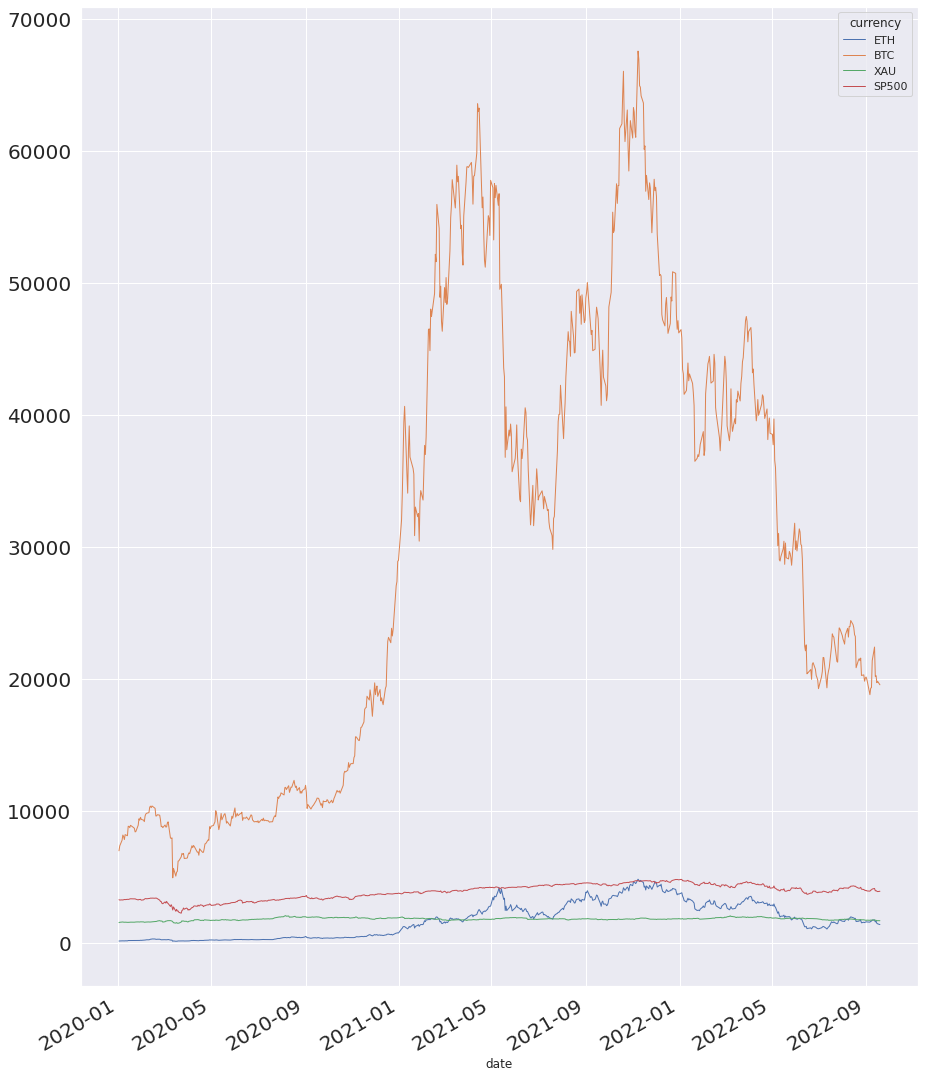

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.898567,0.248814,0.914405
BTC,0.898567,1.000000,0.213348,0.844523
XAU,0.248814,0.213348,1.000000,0.357882
SP500,0.914405,0.844523,0.357882,1.000000


In [8]:
#hide ### Koreliacijos matrica.

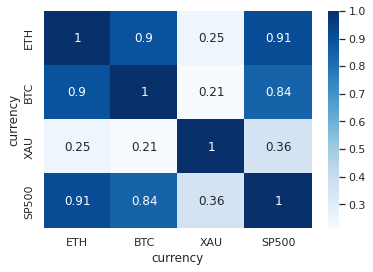

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')